In [1]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\Saumya\\GROUP 2-DA'

In [3]:
# load the dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# if null values are there in the numerical column we have to replace with mean or median
# if null values are there in the categorical column we have to replace with mode

In [8]:
df.describe() # descriptive statistics 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## Visualisation

### Univariate analysis

2023-05-02 10:47:56,812 [2780] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



<AxesSubplot:xlabel='age', ylabel='Density'>

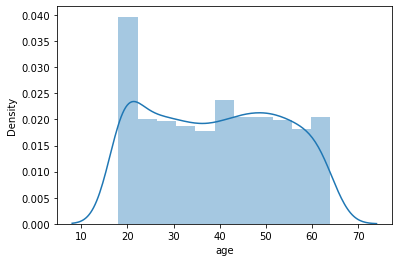

In [10]:
sns.distplot(df.age)

2023-05-02 10:48:21,570 [2780] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



<AxesSubplot:xlabel='bmi', ylabel='Density'>

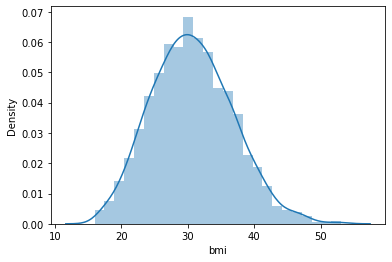

In [11]:
sns.distplot(df.bmi)

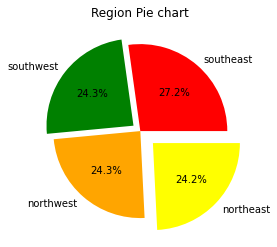

In [19]:
plt.pie(df.region.value_counts(),[0,0.1,0,0.2],labels = ['southeast','southwest','northwest','northeast'],colors = ['red','green','orange','yellow'],autopct="%1.1f%%")
plt.title('Region Pie chart')
plt.show()

### Bivariate Analysis

<AxesSubplot:xlabel='age', ylabel='charges'>

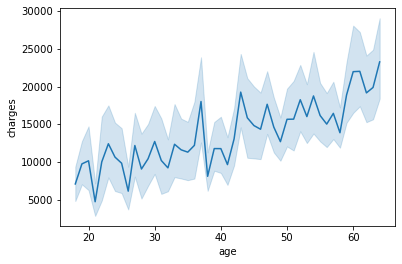

In [12]:
sns.lineplot(x=df.age,y = df.charges)

<AxesSubplot:xlabel='bmi', ylabel='age'>

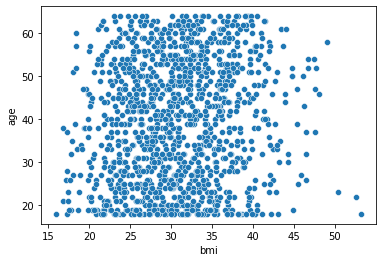

In [15]:
sns.scatterplot(x=df.bmi,y = df.age)

### Multivariate Analysis

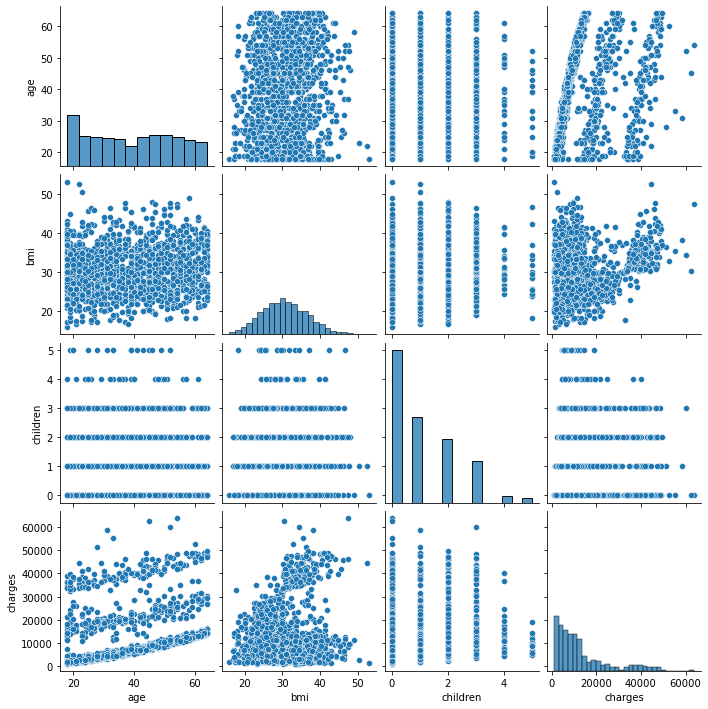

In [20]:
sns.pairplot(df)

In [21]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

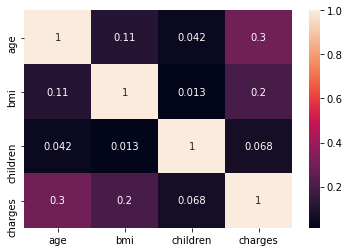

In [23]:
sns.heatmap(df.corr(),annot = True)

## Outlier Detection

2023-05-02 11:19:03,650 [2780] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



<AxesSubplot:xlabel='bmi'>

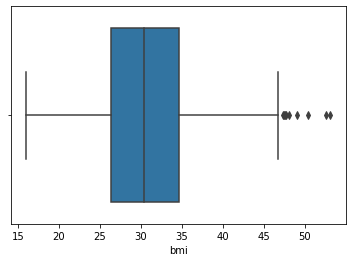

In [24]:
sns.boxplot(df.bmi)

In [25]:
q1 = df.bmi.quantile(0.25) # Q1
q3 = df.bmi.quantile(0.75) # Q3


In [27]:
IQR = q3-q1

In [28]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [29]:
upper_limit

47.290000000000006

In [30]:
df.median()

2023-05-02 11:26:35,948 [2780] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-30-6d467abf240d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()



age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [31]:
df['bmi'] = np.where(df['bmi']>upper_limit,30,df['bmi'])

2023-05-02 11:28:24,655 [2780] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



<AxesSubplot:xlabel='bmi'>

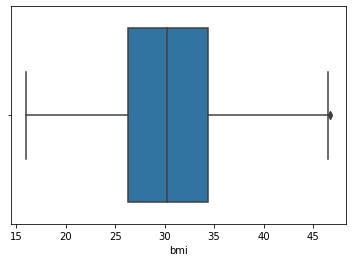

In [32]:
sns.boxplot(df['bmi'])

In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Encoding Techniques

## 1.Label encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()

In [36]:
df.sex= le.fit_transform(df.sex)
df.smoker= le.fit_transform(df.smoker)

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


## 2.One hot encoding

In [38]:
df_main=pd.get_dummies(df,columns=['region'])
df_main.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


## X and y split

In [39]:
X =df_main.drop(columns=['charges'],axis =1)
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


In [40]:
y=df_main.charges
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [41]:
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


## scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [44]:
X_scaled =pd.DataFrame(scale.fit_transform(X),columns =X.columns)

In [46]:
X_scaled.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.0,0.387788,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,1.0,0.578435,0.2,0.0,0.0,0.0,1.0,0.0
2,0.217391,1.0,0.553426,0.6,0.0,0.0,0.0,1.0,0.0
3,0.326087,1.0,0.219065,0.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,1.0,0.419617,0.0,0.0,0.0,1.0,0.0,0.0


## Train test split

In [49]:
df.shape

(1338, 7)

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state =0)

In [48]:
x_train.shape

(1070, 9)

In [50]:
x_test.shape

(268, 9)